In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
import math
import seaborn as sns

In [2]:
#loading the excel file
data=pd.read_csv("C:\\Users\\gaurav.rungta\\Desktop\\Python Cohort\\Data\\USDINR.csv")

In [3]:
#adding other relevent rows
data['Timestamp']=pd.to_datetime(data['Timestamp'])
data['Expiry']=pd.to_datetime(data['Expiry'])
data['Points']=data['Adjusted Price(average)']-data['Adjusted Price(average)'].shift(1)
data['Day_of_week']=data['Timestamp'].dt.dayofweek
data['daily%']=data['Points']/data['Adjusted Price(average)']*100
data['position']=np.where((data['Day_of_week']==4) & (data['Day_of_week'].shift(-1)==0),1,0)
data['gain%']=data['position'].shift(1) * data['daily%']
data['expiry_day']=data['Expiry'].dt.dayofweek

# Replacing Nan values
data['gain%'].fillna(0, inplace=True)

#cutting the dataframe to remove noise
data_cut=pd.DataFrame({'Date': data['Timestamp'],'Price':data['Adjusted Price(average)'],'Position':data['position'],'returns':data['daily%'],'gain%':data['gain%']})

#Replacing Nan values
data_cut['gain%'].fillna(0, inplace=True)
data_cut['returns'].fillna(0, inplace=True)


#New DF with 0 values in gain% removed
data1=data_cut[data_cut['gain%']!=0]


# calculating all parameters

Enter the leverage value: 4
Buy and Hold Returns : 500.21 %
Strategy Returns : 793.63 %
Maximum Drawdown : -16.67 % 
Trades  : 512
Wins : 303
Losses : 209
Win Rate : 59.18 %
Best Trade : 7.83 %
Worst Trade : -4.49 %
Average Gain : 0.44 %
Volatility (Ann) : 26.64 %
Sharpe Ratio : 0.26 
Sortino Ratio : 0.59 
Calmar Ratio : 2.67 


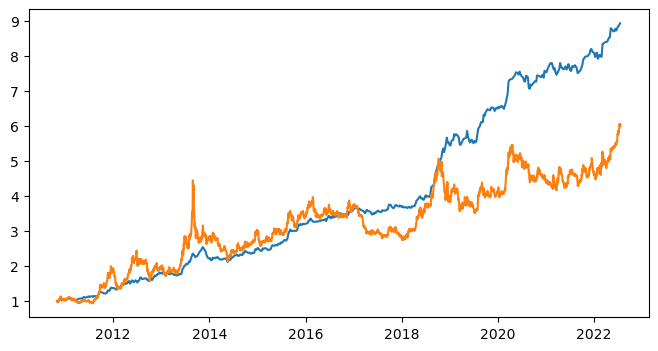

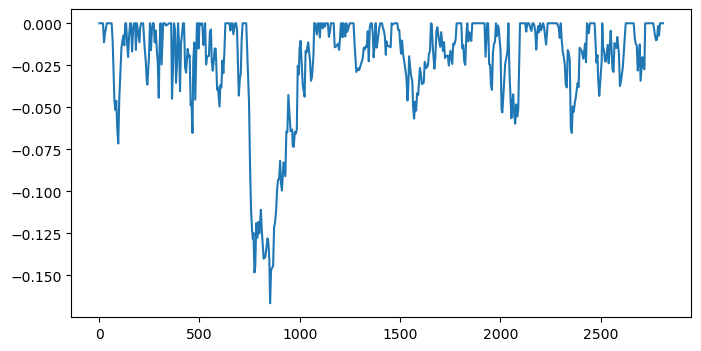

In [5]:

def backtesting_parameters():

    leverage = float(input("Enter the leverage value: "))    
    
#generate equity curve
    equity_curve = (1 + (leverage*(data1['gain%']/100)) ).cumprod()
    buy_n_hold = (1+leverage*data_cut['returns']/100).cumprod()
    end = equity_curve.iloc[-1]-1
    end2 = buy_n_hold.iloc[-1]-1
    plt.figure(figsize=(8,4))
    plt.plot(data1['Date'], equity_curve)
    plt.plot(data_cut['Date'], buy_n_hold) 
    
# Calculating drawdowns
    previous_peaks = equity_curve.cummax()
    drawdown = (equity_curve - previous_peaks) / previous_peaks
    plt.figure(figsize=(8,4))
    plt.plot(drawdown)
           
    
# Trade parameters
    trades=data_cut['Position'].sum()
    wins= (data_cut['gain%']>0).sum()
    losses = trades - wins
    win_rate = wins/trades
    Best_Trade = leverage*data1['gain%'].max()
    Worst_Trade = leverage*data1['gain%'].min()
    Average_Trade = leverage*data1['gain%'].mean()
    Max_DD = drawdown.min()
#returns for buy and hold vs strategy
    bnh_ret = (data_cut['returns']/100+1).prod() -1
    str_ret = (data_cut['gain%']+1).prod() -1
    
    
# Ratios and Volatility
# Risk Free rate assumed to be 0
    vol = (leverage*data1['gain%']).std()*(252**0.5)
    sharpe = (leverage*data1['gain%']).mean()/(leverage*data1['gain%']).std()
    down_return = (leverage*data1['gain%']).where(data1['gain%']<0,0)
    sortino = (leverage*data1['gain%']).mean()/down_return.std()
    calmar = (leverage*data1['gain%']).mean()/abs(drawdown.min())
        
    print(f"Buy and Hold Returns : {end2*100:.2f} %")
    print(f"Strategy Returns : {end*100:.2f} %")
    print(f"Maximum Drawdown : {Max_DD*100:.2f} % ")
    print(f"Trades  : {trades}")
    print(f"Wins : {wins}")
    print(f"Losses : {losses}")
    print(f"Win Rate : {win_rate*100:.2f} %")
    print(f"Best Trade : {Best_Trade:.2f} %")
    print(f"Worst Trade : {Worst_Trade:.2f} %")
    print(f"Average Gain : {Average_Trade:.2f} %")
    print(f"Volatility (Ann) : {vol:.2f} %")
    print(f"Sharpe Ratio : {sharpe:.2f} ")
    print(f"Sortino Ratio : {sortino:.2f} ")
    print(f"Calmar Ratio : {calmar:.2f} ")
    
backtesting_parameters()